In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

In [2]:
x, y = make_classification(n_samples=100
                          ,n_features=2
                          ,n_redundant=0
                          ,n_informative=2
                          ,random_state=1
                          ,n_clusters_per_class=1
                          ,shuffle=True)

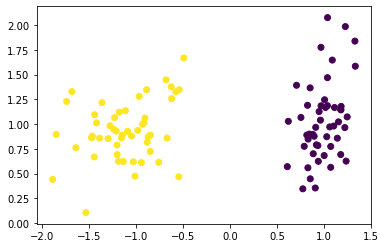

In [3]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

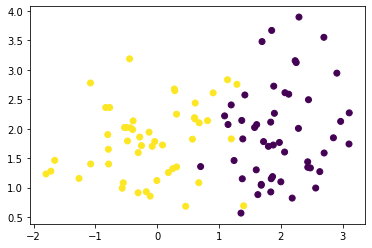

In [4]:
rng = np.random.RandomState(2)
x += 2*rng.uniform(size=x.shape)
linearly_seperable = (x,y)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [5]:
datasets = [make_moons(noise=0.3,random_state=0),
           make_circles(noise=0.2,factor=0.5,random_state=1),
           linearly_seperable]

In [6]:
 figure = plt.figure(figsize=(6,9))
    

<Figure size 432x648 with 0 Axes>

In [7]:
i=1

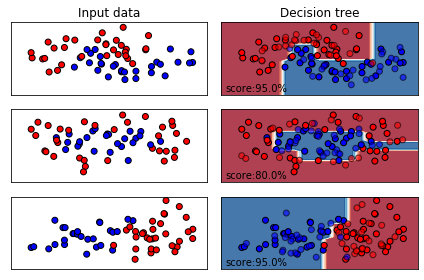

In [8]:
for ds_index, ds in enumerate(datasets):
    x,y = ds
    #scale the data with the standard method
    x=StandardScaler().fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=42)
    
    #size of xlim and ylim
    x0_min, x0_max = x[:,0].min()-0.5, x[:,0].max()+0.5
    x1_min, x1_max = x[:,1].min()-0.8, x[:,1].max()+0.5 
    array1, array2 = np.meshgrid(np.arange(x0_min,x0_max,0.2),np.arange(x1_min,x1_max,0.2))
    
    #set the colors
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000','#0000FF'])
    
    #plot the training data
    ax=plt.subplot(len(datasets),2,i)
    i += 1
    if ds_index == 0:
        ax.set_title('Input data')
    
    ax.scatter(x_train[:,0],x_train[:,1],c=y_train,
              cmap=cm_bright, edgecolors='k')
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    #plot the predictions of decision tree
    ax = plt.subplot(len(datasets),2,i)
    i += 1
    
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(x_train,y_train)
    score = clf.score(x_test, y_test)
    
    #z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:,1]
    #print(clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[1:5,:])
    z = clf.predict(np.c_[array1.ravel(),array2.ravel()])
    z = z.reshape(array1.shape)
    ax.contourf(array1,array2,z,cmap=cm,alpha=0.8)
    ax.scatter(x_train[:,0],x_train[:,1],c=y_train,
              cmap=cm_bright, edgecolors='k')
    ax.scatter(x_test[:,0],x_test[:,1],c=y_test,
              cmap=cm_bright, edgecolors='k',alpha=0.6)
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    if ds_index == 0:
        ax.set_title('Decision tree')
        
    ax.text(array1.min()+0.1, array2.min()+0.3, 'score:{s:.1f}%'.format(s=score*100),
           size=10,horizontalalignment='left')
    
    
plt.tight_layout()
plt.show()
    